In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# User inputs
n=1000
seed=42

In [3]:
# Data generation
np.random.seed(seed)
x1 = np.random.uniform(0, 10, size=n)
x2 = np.random.normal(0, 10, size=n)
noise = np.random.normal(0, 5, size=n)
y = 10 * x1**2 + 3 * x2 + noise
X_orig = np.column_stack((x1, x2))

In [4]:
# Auxiliary functions

def print_model_summary(model, y_test, y_pred, model_name="Model"):
    print(f"==== {model_name} ====")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_pred))

def plot_predictions(y_test, predictions_dict):
    plt.figure(figsize=(12, 10))
    for i, (title, y_pred) in enumerate(predictions_dict.items()):
        plt.subplot(2, 2, i + 1)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(title)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
    plt.tight_layout()
    plt.show()

# OLS with x1 (original)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

print_model_summary(model, y_test, y_pred1, model_name="OLS with x1 (original)")

==== OLS with x1 (original) ====
Coefficients: [99.87507805  2.69152832]
Intercept: -163.0815588636928
R^2 Score: 0.933012044885663
RMSE: 75.8813687976157


# OLS with x1' = sqrt(x1)

In [6]:
X_sqrt = np.column_stack((np.sqrt(x1), x2))

X_train, X_test, y_train, y_test = train_test_split(X_sqrt, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred2 = model.predict(X_test)

print_model_summary(model, y_test, y_pred2, model_name="OLS with x1' = sqrt(x1)")

==== OLS with x1' = sqrt(x1) ====
Coefficients: [364.32103513   2.44763559]
Intercept: -431.13122282367084
R^2 Score: 0.8059988772218039
RMSE: 129.13349868221982


# OLS with x1' = 100 * (x1 - 2)

In [7]:
X_scaled = np.column_stack((100 * (x1 - 2), x2))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred3 = model.predict(X_test)

print_model_summary(model, y_test, y_pred3, model_name="OLS with x1' = 100 * (x1 - 2)")

==== OLS with x1' = 100 * (x1 - 2) ====
Coefficients: [0.99875078 2.69152832]
Intercept: 36.66859723364706
R^2 Score: 0.933012044885663
RMSE: 75.88136879761572


# Ridge with x1' = 100 * (x1 - 2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = Ridge(alpha=2.0)
model.fit(X_train, y_train)

y_pred4 = model.predict(X_test)

print_model_summary(model, y_test, y_pred4, model_name="Ridge with x1' = 100 * (x1 - 2)")

==== Ridge with x1' = 100 * (x1 - 2) ====
Coefficients: [0.99875061 2.69145185]
Intercept: 36.668738972387246
R^2 Score: 0.9330120247052576
RMSE: 75.88138022740686


# Plot

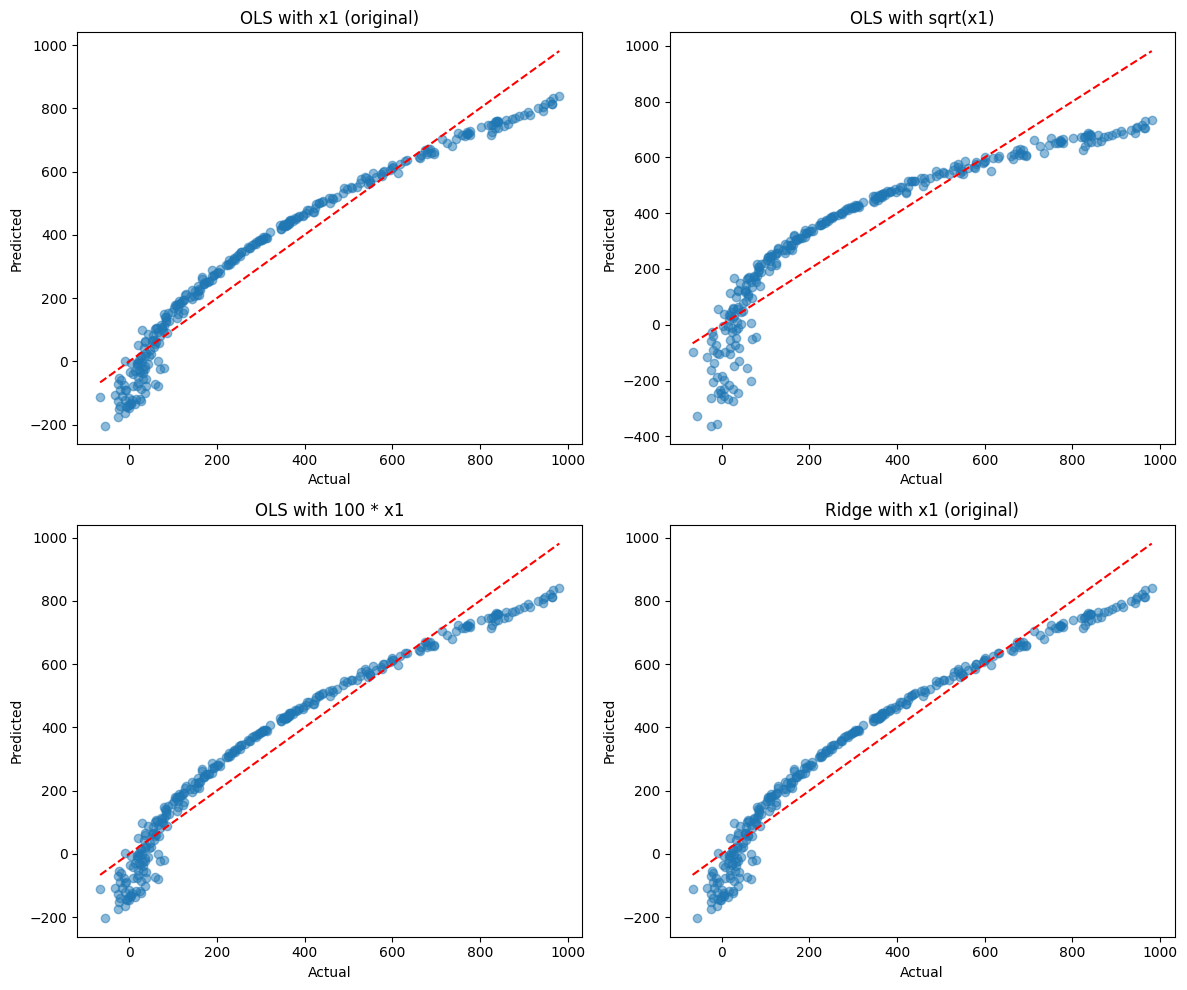

In [9]:
predictions = {
    "OLS with x1 (original)": y_pred1,
    "OLS with sqrt(x1)": y_pred2,
    "OLS with 100 * x1": y_pred3,
    "Ridge with x1 (original)": y_pred4,
}

plot_predictions(y_test, predictions)